In [1]:
import pandas as pd

# Adjust display options
pd.set_option('display.max_colwidth', None)  # Set column width to display full text
pd.set_option('display.max_rows', None)   

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/Users/jazlynjose/Documents/nlp/Dataset/dropped.csv"
df = pd.read_csv(file_path)

df.head(10)

,Post_ID,User,Type,Title,Content,Timestamp,Parent_Post_ID,close,Authority_Score,Hub_Score,user_type
0,1,adhitthana,Post,bitcoin fit within capitalism style,buy little ago digital bitcoin thankfully sell half wonder place profit panie crypto space feel need hear input opinion unusual seek opinion seek broad wisdom herei make digital bitcoin late cryptsy,2014-09-17,-1,457.33,0.002964,0.028281,top
1,1,jonald_fyookball,Comment,bitcoin fit within capitalism style,invest panie risky invest bitcoin need bitcoin succeed need pany,2014-09-17,1,457.33,0.109546,0.111865,top
2,3,CryptoMark2585,Post,bitcoin illegal,know bitcoin legalbut country call bit coin legalwhy approve,2018-01-18,-1,11474.90,0.000024,0.004772,low
3,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby banker keep money account happen move exchange end regulate bitcoin,2018-01-18,3,11474.90,0.001106,0.000000,top
4,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem becouse control tecnology,2018-01-18,3,11474.90,0.000062,0.000000,low
5,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exchange individual trade invest prohibit,2018-01-18,3,11474.90,0.000052,0.000000,low
6,3,crypto90,Comment,bitcoin illegal,know moment bitcoin totally legal otherwise pany accept payment method internet exist around site accept payment type believe bitcoin absolutely legal,2018-01-18,3,11474.90,0.000046,0.000000,low
7,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi china ban use bitcoin exchange bitcoin decentralize would government legalize always work seem idea search bar forum would find interesting topic read,2018-01-18,3,11474.90,0.003704,0.000000,top
8,3,crustycrab666,Comment,bitcoin illegal,country legal japanese illegal russia depend country give policy government aware cryptocurrency positive impact aware negative impact generate illegal trade black market terrorist financing drug trafficking etc country legalize certain rule unequivocally declare illegal provide regulation framework rule,2018-01-18,3,11474.90,0.000184,0.000000,low
9,3,ralle14,Comment,bitcoin illegal,certain country ban bitcoin use criminal activity transaction buy illegal country different reason ban bitcoin mention look googlequote crypto pma know moment bitcoin totally legal otherwise pany accept payment method internet exist around site accept payment type believe bitcoin absolutely legal indeed legal country country involve crypto,2018-01-18,3,11474.90,0.013702,0.000000,top


In [3]:
import pandas as pd

# Assuming 'dropped_df' is your existing DataFrame

# Convert 'Timestamp' column to datetime if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter rows where 'Timestamp' is between 2015-01-01 and 2018-12-31
mask = (df['Timestamp'] >= '2015-01-01') & (df['Timestamp'] <= '2018-12-31')
new_df = df.loc[mask]

# Verify the new DataFrame
new_df.head(10)

,Post_ID,User,Type,Title,Content,Timestamp,Parent_Post_ID,close,Authority_Score,Hub_Score,user_type
2,3,CryptoMark2585,Post,bitcoin illegal,know bitcoin legalbut country call bit coin legalwhy approve,2018-01-18,-1,11474.9,0.000024,0.004772,low
3,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby banker keep money account happen move exchange end regulate bitcoin,2018-01-18,3,11474.9,0.001106,0.000000,top
4,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem becouse control tecnology,2018-01-18,3,11474.9,0.000062,0.000000,low
5,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exchange individual trade invest prohibit,2018-01-18,3,11474.9,0.000052,0.000000,low
6,3,crypto90,Comment,bitcoin illegal,know moment bitcoin totally legal otherwise pany accept payment method internet exist around site accept payment type believe bitcoin absolutely legal,2018-01-18,3,11474.9,0.000046,0.000000,low
7,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi china ban use bitcoin exchange bitcoin decentralize would government legalize always work seem idea search bar forum would find interesting topic read,2018-01-18,3,11474.9,0.003704,0.000000,top
8,3,crustycrab666,Comment,bitcoin illegal,country legal japanese illegal russia depend country give policy government aware cryptocurrency positive impact aware negative impact generate illegal trade black market terrorist financing drug trafficking etc country legalize certain rule unequivocally declare illegal provide regulation framework rule,2018-01-18,3,11474.9,0.000184,0.000000,low
9,3,ralle14,Comment,bitcoin illegal,certain country ban bitcoin use criminal activity transaction buy illegal country different reason ban bitcoin mention look googlequote crypto pma know moment bitcoin totally legal otherwise pany accept payment method internet exist around site accept payment type believe bitcoin absolutely legal indeed legal country country involve crypto,2018-01-18,3,11474.9,0.013702,0.000000,top
10,3,3gon,Comment,bitcoin illegal,cryptomark pma know bitcoin legalbut country call bit coin legalwhy approve ittheir government proclaim illegal value disrupt whatever currency country,2018-01-18,3,11474.9,0.000082,0.000000,low
11,3,Rukawa2k,Comment,bitcoin illegal,bitcoin new innovation yet fully implement legal framework government world try get grip risk reward play game consumer protection anticriminal activity encourage innovation yet bitcoin illegal legal,2018-01-18,3,11474.9,0.000046,0.000000,low


In [4]:
import pandas as pd

# Assuming 'data' is your dataset, you can read it into a DataFrame
# Replace 'data.csv' with the actual file name or path to your dataset

# Get the number of rows and columns
num_rows, num_columns = new_df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 192111
Number of columns: 11


In [9]:
new_df.dtypes

Post_ID                     int64
User                       object
Type                       object
Title                      object
Content                    object
Timestamp          datetime64[ns]
Parent_Post_ID              int64
close                     float64
Authority_Score           float64
Hub_Score                 float64
user_type                  object
dtype: object

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
# Assuming new_df is your DataFrame containing 'Content' and 'close' columns

# Define custom stop words
custom_stop_words = set(ENGLISH_STOP_WORDS)
custom_stop_words.update(["use", "need", "could", "thank", "nice", "great", "sound", "look", "would", "make",
                          "know", "take", "happen", "get", "look", "work", "read", "idea", "good", "job",
                          "pretty", "place", "send", "new", "sure"])


In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from datetime import datetime
from scipy.stats import pearsonr


# Filter out NaN values in the 'Content' column
new_df = new_df.dropna(subset=['Content'])

# Create a vocabulary
voca = set()
for content in new_df['Content']:
    if isinstance(content, str):  # Check if the content is a string
        voca.update(content.split())
voca = list(voca)


In [14]:
# Create voca2idx dictionary
voca2idx = {w: i for i, w in enumerate(voca)}



In [15]:
# Load Bitcoin price data
prices_list = []
with open("/Users/jazlynjose/Documents/nlp/Dataset/price_bitcoin (1).tsv") as f:
    next(f)
    for line in f:
        price = {}
        line = line[:-1]
        date, open_, high, low, close, volume, market_cap = line.split('\t')
        price['date'] = datetime.strptime(date, '%b %d, %Y').date()
        price['open'] = float(open_.replace(',', ''))
        price['high'] = float(high.replace(',', ''))
        price['low'] = float(low.replace(',', ''))
        price['close'] = float(close.replace(',', ''))
        try:
            price['volume'] = float(volume.replace(',', ''))
        except:
            break
        price['market_cap'] = float(market_cap.replace(',', ''))
        prices_list.append(price)




In [16]:
# Reverse and trim Bitcoin price data
prices_list.reverse()
prices_list = prices_list[521:-27]  # Feb 02, 2018까지


In [17]:
# Prepare time data for topic modeling# Prepare time data for topic modeling
time_list = sorted(new_df['Timestamp'].unique())
time_list = [t for t in time_list if pd.Timestamp(t).date() >= datetime(2015, 6, 1).date()]


In [18]:
# Create term-document matrix (TDM)
tdm = np.zeros((len(time_list), len(voca)), dtype=np.float32)
for i, time in enumerate(time_list):
    for content in new_df[new_df['Timestamp'] == time]['Content']:
        for word in content.split():
            tdm[i, voca2idx[word]] += 1



In [19]:
# Normalize TDM
tdm = normalize(tdm)


In [20]:
# Topic modeling using NMF
K = 10
nmf = NMF(n_components=K, max_iter=500)
W = nmf.fit_transform(tdm).T
H = nmf.components_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


In [21]:
# Extract Bitcoin prices
prices = np.array([p['close'] for p in prices_list])


In [22]:
# Ensure the lengths of prices and W are matching
if len(prices) != W.shape[1]:
    min_len = min(len(prices), W.shape[1])
    prices = prices[:min_len]
    W = W[:, :min_len]
    
# Calculate correlation and p-value of each topic with Bitcoin price
topic_time_correlation = []
for k in range(K):
    topic_time_correlation.append(pearsonr(prices, W[k]))

topic_time_correlation = np.array(topic_time_correlation)  # Pearson correlation and p-value
top_topic = np.argsort(np.abs(topic_time_correlation[:, 0]))[::-1]



In [23]:
# Print top topics
for k in top_topic[:5]:
    print(f"{k+1}th topic, correlation: {topic_time_correlation[k, 0]}, p-value: {topic_time_correlation[k, 1]:.2e}")
    for i in H[k, :].argsort()[::-1][:30]:
        print(voca[i], end=' ')
    print()

6th topic, correlation: 0.5813413644139737, p-value: 1.67e-88
price bitcoin would coin buy exchange money get market make time sell crypto good currency know happen value invest high year cryptocurrency new big government china day take altcoin profit 
2th topic, correlation: -0.3954314603723051, p-value: 1.51e-37
would get use make good pay need could money know bitcoin work time buy site take look try idea service find give start accept business card exchange run big sure 
1th topic, correlation: 0.24613213016821459, p-value: 8.25e-15
bitcoin use know good accept currency country year payment time future world need buy happen mean make million user gold hold value number real cash news online article start new 
10th topic, correlation: -0.2278707992370235, p-value: 7.42e-13
block would miner size time increase need make mining could blockchain transaction limit network node year get price new big take hash happen change mine work power every system number 
8th topic, correlation: -0.

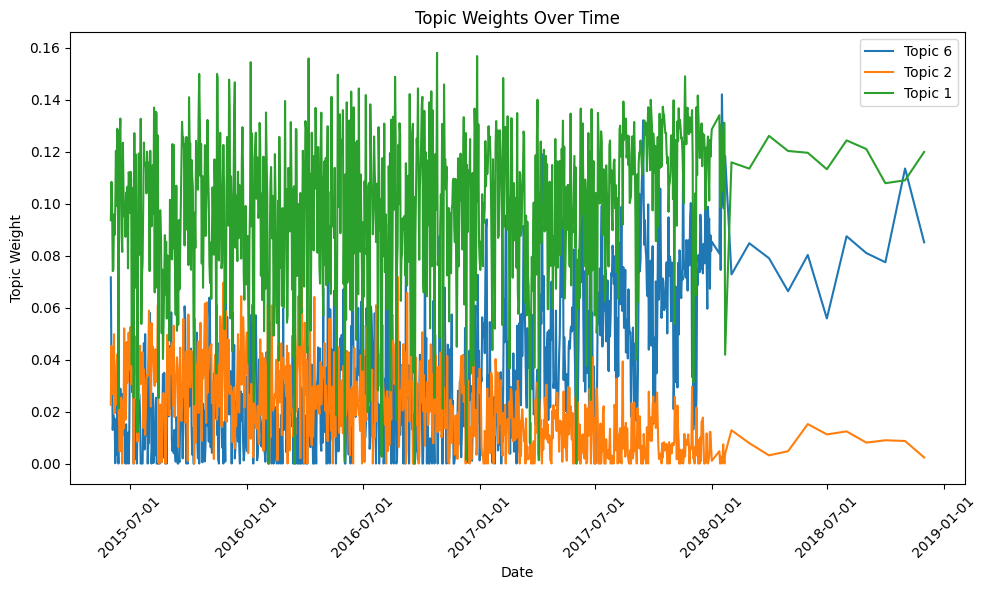

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import for handling dates

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add each topic to the Line chart
for k in top_topic[:3]:
    ax.plot(time_list, W[k], label=f"Topic {k+1}")

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Topic Weight')
ax.set_title('Topic Weights Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


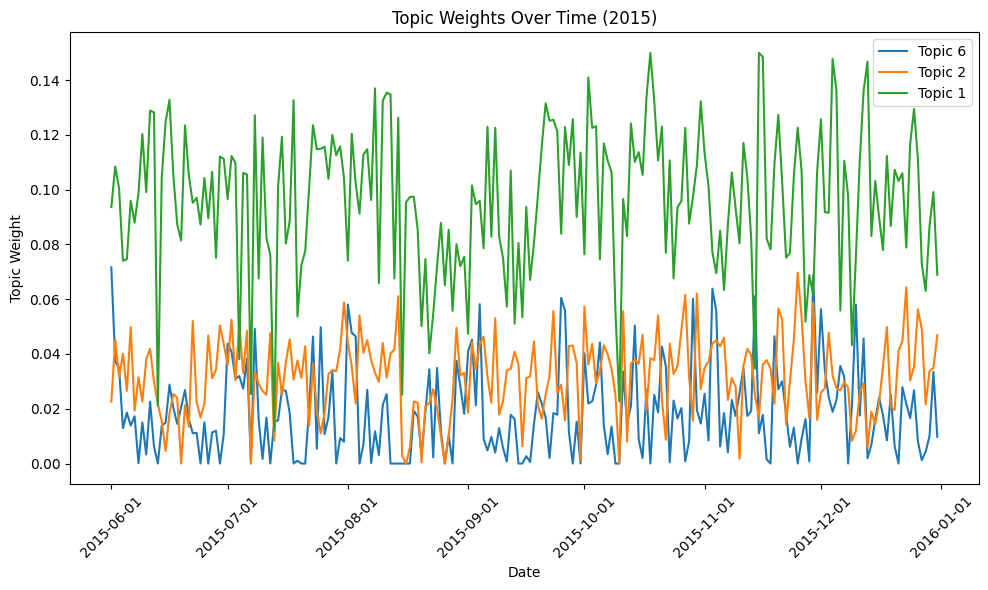

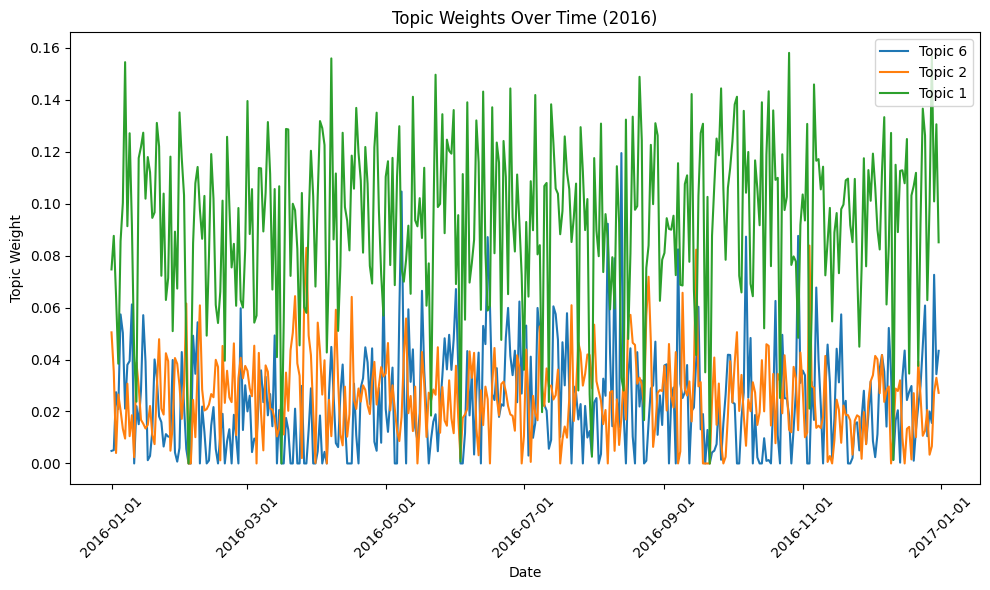

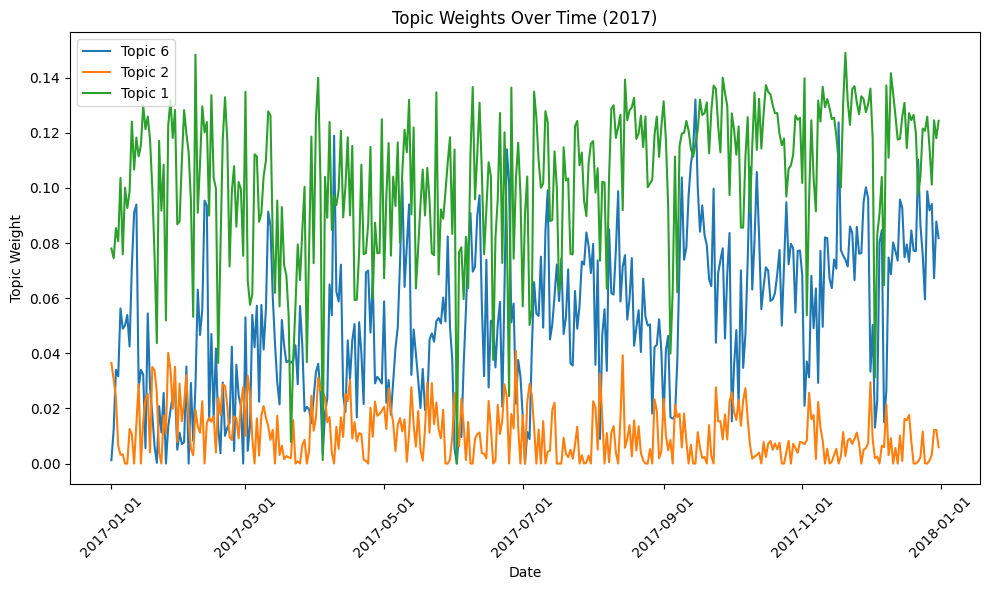

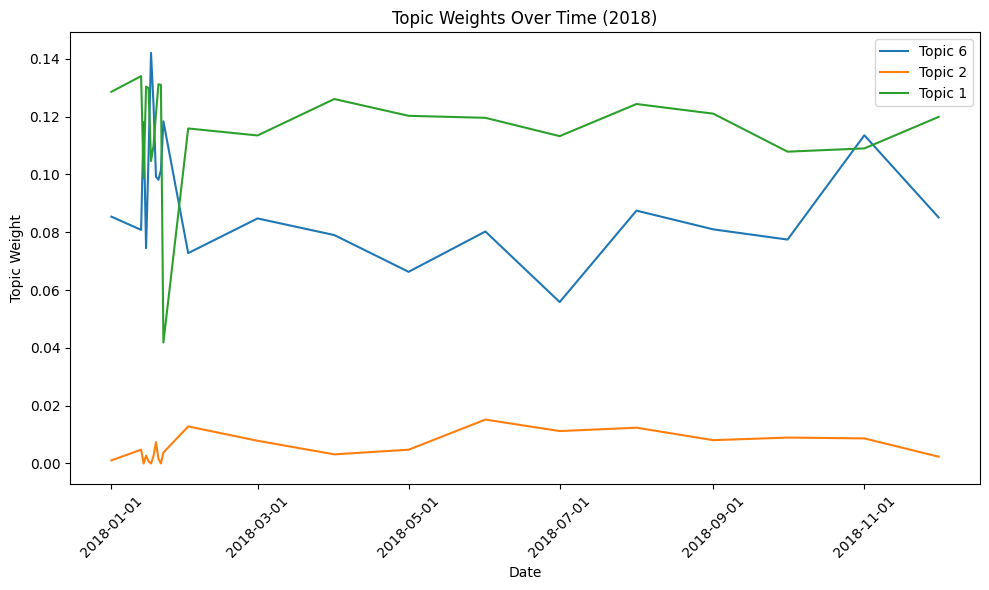

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import for handling dates

# Define the years
years = [2015, 2016, 2017, 2018]

# Plot for each year
for year in years:
    # Filter data for the specific year
    start_date = pd.Timestamp(datetime(year, 1, 1))
    end_date = pd.Timestamp(datetime(year, 12, 31))
    indices_year = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
    time_list_year = [time_list[i] for i in indices_year]
    W_year = W[:, indices_year]
    
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Add each topic to the Line chart
    for k in top_topic[:3]:
        ax.plot(time_list_year, W_year[k], label=f"Topic {k+1}")

    # Format the x-axis as dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Topic Weight')
    ax.set_title(f'Topic Weights Over Time ({year})')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add legend
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


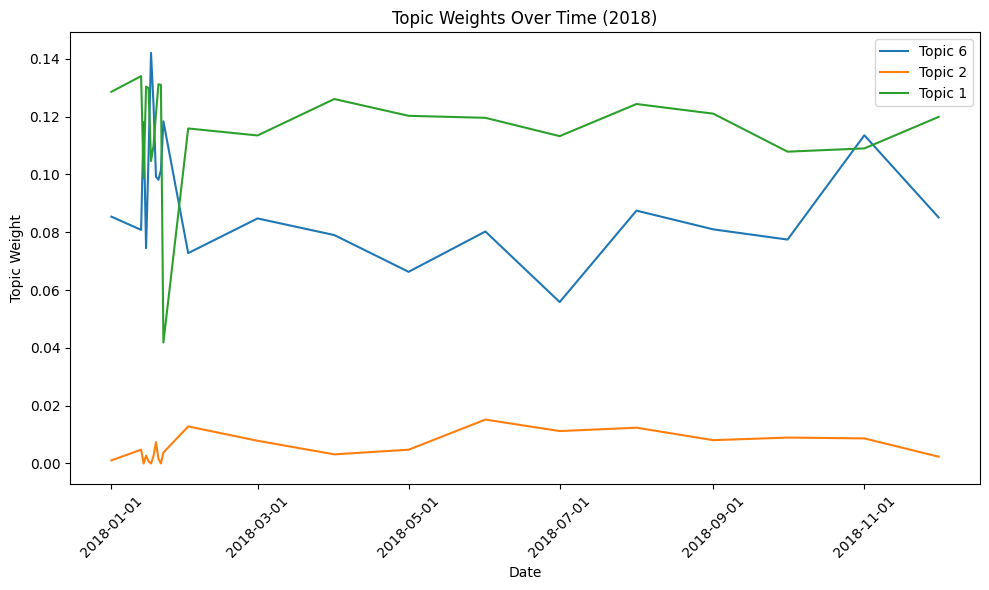

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Filter data for the year 2018
start_date = pd.Timestamp(datetime(2018, 1, 1))
end_date = pd.Timestamp(datetime(2018, 12, 31))
indices_2018 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2018 = [time_list[i] for i in indices_2018]
W_2018 = W[:, indices_2018]

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add each topic to the Line chart
for k in top_topic[:3]:
    ax.plot(time_list_2018, W_2018[k], label=f"Topic {k+1}")

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Topic Weight')
ax.set_title('Topic Weights Over Time (2018)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


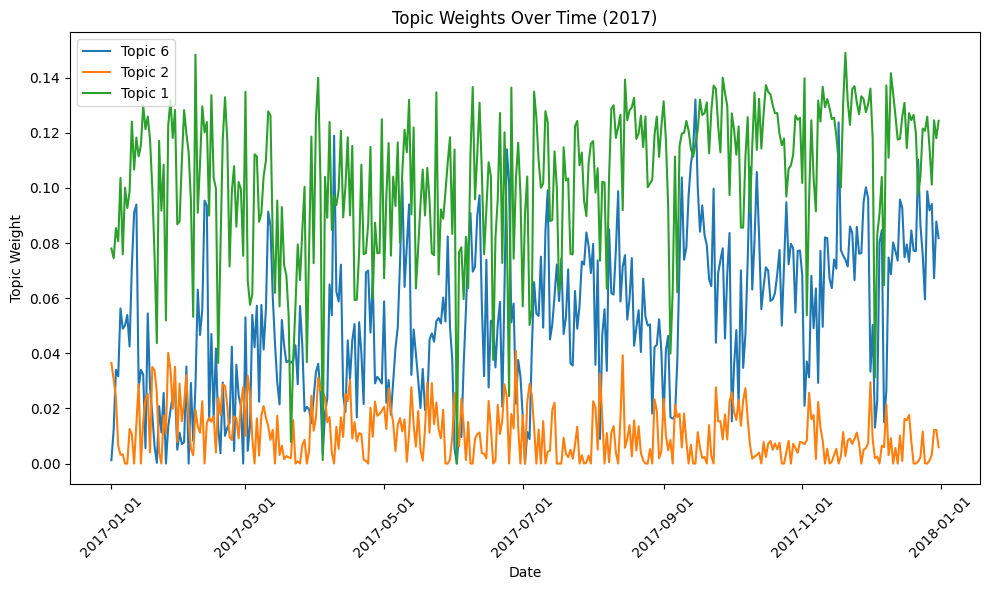

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Filter data for the year 2017
start_date = pd.Timestamp(datetime(2017, 1, 1))
end_date = pd.Timestamp(datetime(2017, 12, 31))  # Update end date accordingly
indices_2017 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2017 = [time_list[i] for i in indices_2017]
W_2017 = W[:, indices_2017]

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add each topic to the Line chart
for k in top_topic[:3]:
    ax.plot(time_list_2017, W_2017[k], label=f"Topic {k+1}")

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Topic Weight')
ax.set_title('Topic Weights Over Time (2017)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


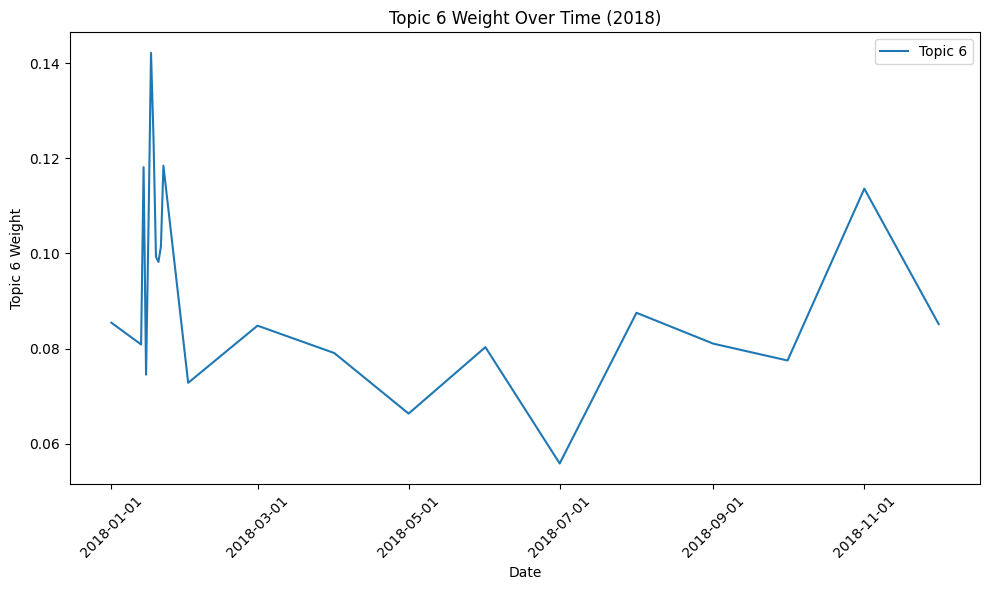

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Filter data for the year 2018
start_date = pd.Timestamp(datetime(2018, 1, 1))
end_date = pd.Timestamp(datetime(2018, 12, 31))
indices_2018 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2018 = [time_list[i] for i in indices_2018]
W_2018 = W[:, indices_2018]

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Topic 6 for 2018
topic_6_weights = W_2018[5]  # Assuming topic indexing starts from 0
ax.plot(time_list_2018, topic_6_weights, label="Topic 6")

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Topic 6 Weight')
ax.set_title('Topic 6 Weight Over Time (2018)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


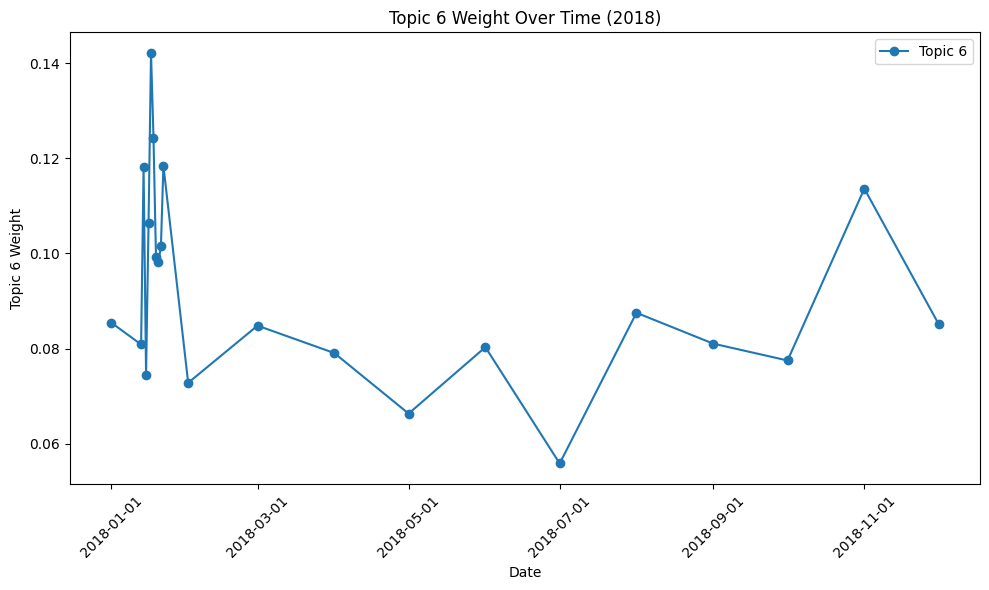

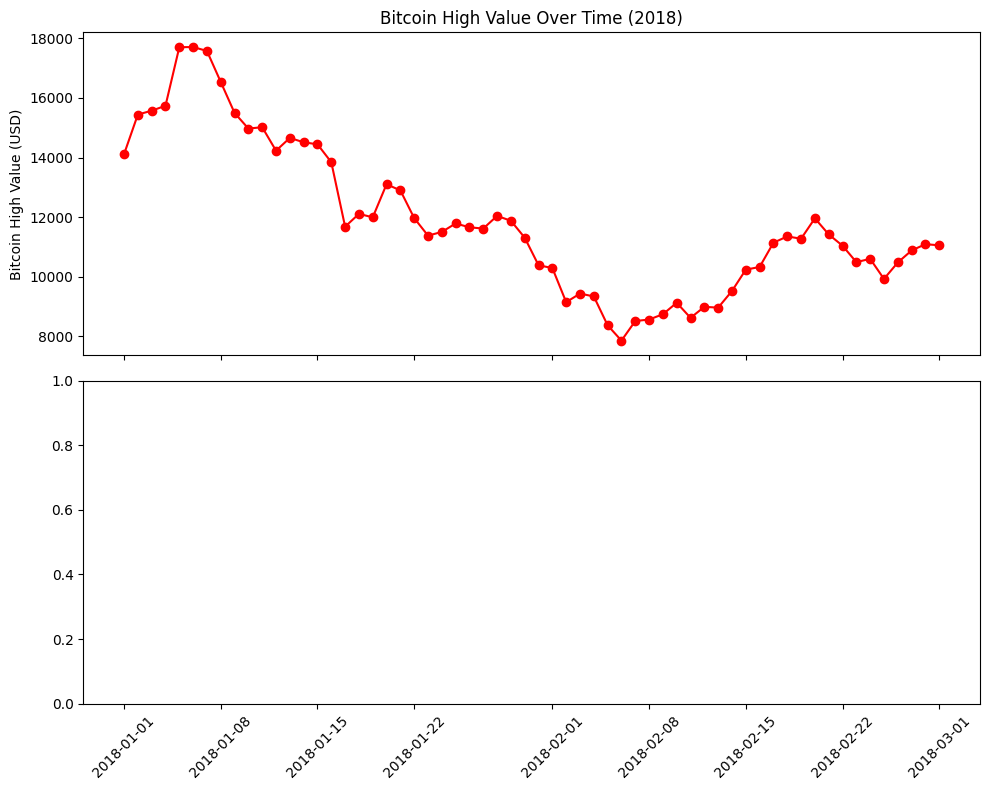

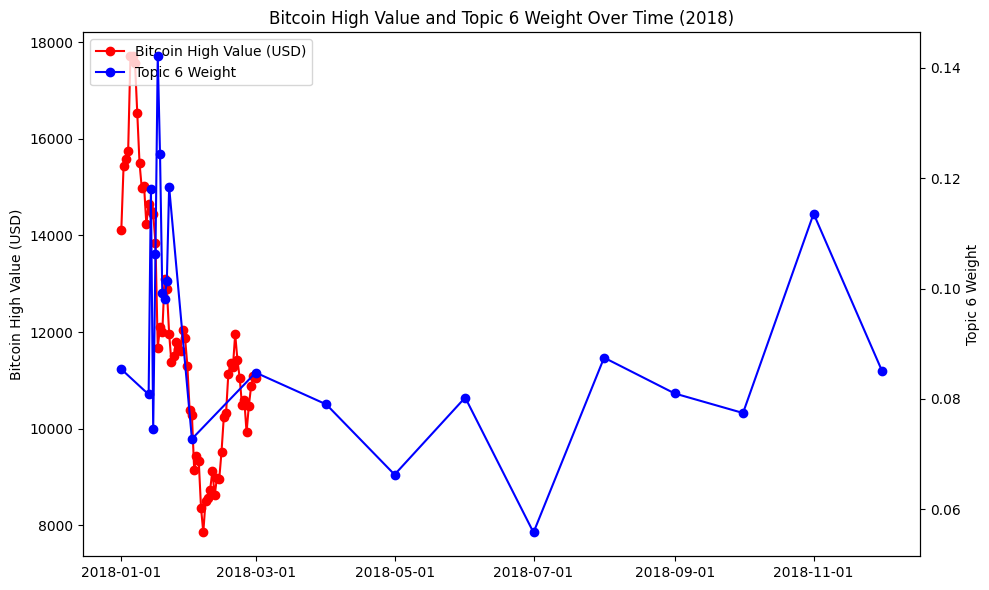

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Filter data for the year 2018
start_date = pd.Timestamp(datetime(2018, 1, 1))
end_date = pd.Timestamp(datetime(2018, 12, 31))
indices_2018 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2018 = [time_list[i] for i in indices_2018]
W_2018 = W[:, indices_2018]

# Load the Bitcoin data
btc_data = pd.read_csv('/Users/jazlynjose/Documents/nlp/Dataset/price_bitcoin (1).tsv', delimiter='\t', parse_dates=['date'])

# Filter Bitcoin data for the year 2018
btc_data_2018 = btc_data[(btc_data['date'] >= datetime(2018, 1, 1)) & (btc_data['date'] <= datetime(2018, 12, 31))]

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin high value for 2018 on the first y-axis
ax1.plot(btc_data_2018['date'], btc_data_2018['high'], marker='o', linestyle='-', color='red', label='Bitcoin High Value (USD)')
ax1.set_ylabel('Bitcoin High Value (USD)')
ax1.set_title('Bitcoin High Value and Topic 6 Weight Over Time (2018)')

# Create a secondary y-axis for Topic 6 weight
ax2 = ax1.twinx()
ax2.plot(time_list_2018, W_2018[5], marker='o', linestyle='-', color='blue', label='Topic 6 Weight')
ax2.set_ylabel('Topic 6 Weight')

# Format the x-axis as dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


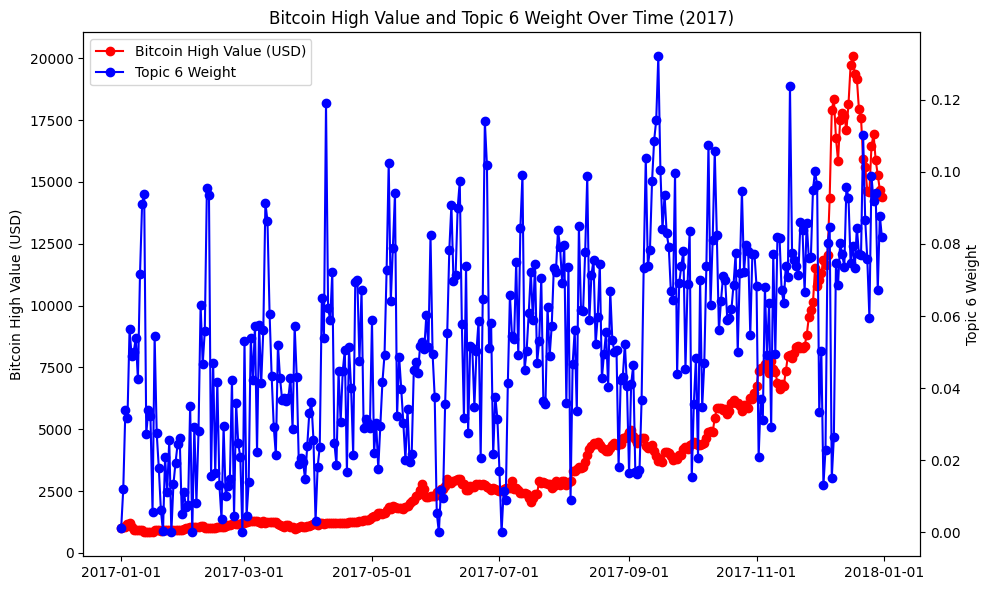

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Filter Bitcoin data for the year 2017
btc_data_2017 = btc_data[(btc_data['date'] >= datetime(2017, 1, 1)) & (btc_data['date'] <= datetime(2017, 12, 31))]

# Filter topic weights for the year 2017
start_date_2017 = pd.Timestamp(datetime(2017, 1, 1))
end_date_2017 = pd.Timestamp(datetime(2017, 12, 31))
indices_2017 = [i for i, date in enumerate(time_list) if start_date_2017 <= date <= end_date_2017]
time_list_2017 = [time_list[i] for i in indices_2017]
W_2017 = W[:, indices_2017]

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin high value for 2017 on the first y-axis
ax1.plot(btc_data_2017['date'], btc_data_2017['high'], marker='o', linestyle='-', color='red', label='Bitcoin High Value (USD)')
ax1.set_ylabel('Bitcoin High Value (USD)')
ax1.set_title('Bitcoin High Value and Topic 6 Weight Over Time (2017)')

# Create a secondary y-axis for Topic 6 weight
ax2 = ax1.twinx()
ax2.plot(time_list_2017, W_2017[5], marker='o', linestyle='-', color='blue', label='Topic 6 Weight')
ax2.set_ylabel('Topic 6 Weight')

# Format the x-axis as dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


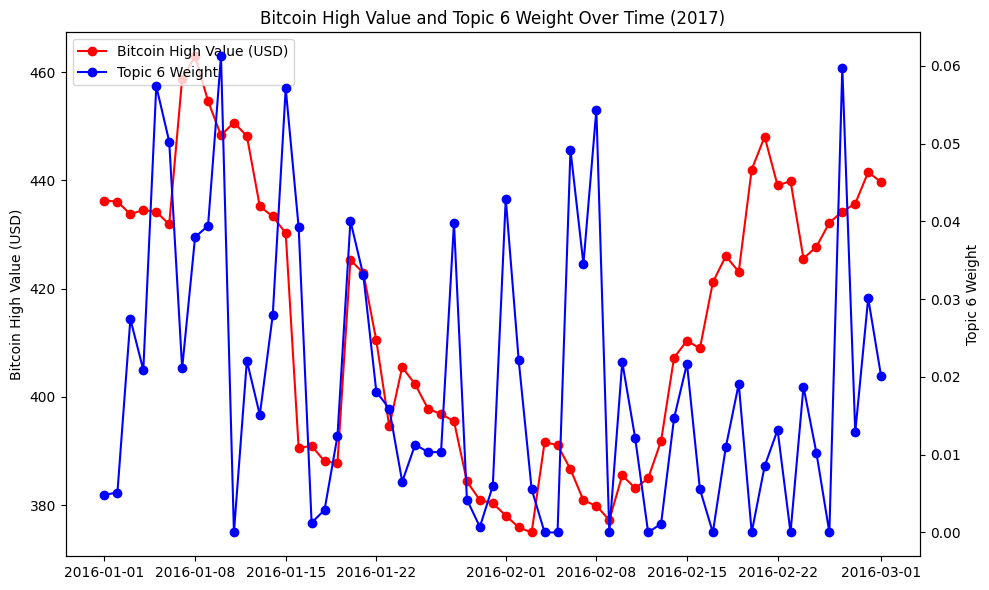

In [93]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Filter data for the year 2017
start_date = pd.Timestamp(datetime(2016, 1, 1))
end_date = pd.Timestamp(datetime(2016, 3, 1))
indices_2017 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2017 = [time_list[i] for i in indices_2017]
W_2017 = W[:, indices_2017]

# Load the Bitcoin data
btc_data = pd.read_csv('/Users/jazlynjose/Documents/nlp/Dataset/price_bitcoin (1).tsv', delimiter='\t', parse_dates=['date'])

# Filter Bitcoin data for the year 2017
btc_data_2017 = btc_data[(btc_data['date'] >= datetime(2016, 1, 1)) & (btc_data['date'] <= datetime(2016, 3, 1))]

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin high value for 2017 on the first y-axis
ax1.plot(btc_data_2017['date'], btc_data_2017['high'], marker='o', linestyle='-', color='red', label='Bitcoin High Value (USD)')
ax1.set_ylabel('Bitcoin High Value (USD)')
ax1.set_title('Bitcoin High Value and Topic 6 Weight Over Time (2017)')

# Create a secondary y-axis for Topic 6 weight
ax2 = ax1.twinx()
ax2.plot(time_list_2017, W_2017[5], marker='o', linestyle='-', color='blue', label='Topic 6 Weight')
ax2.set_ylabel('Topic 6 Weight')

# Format the x-axis as dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


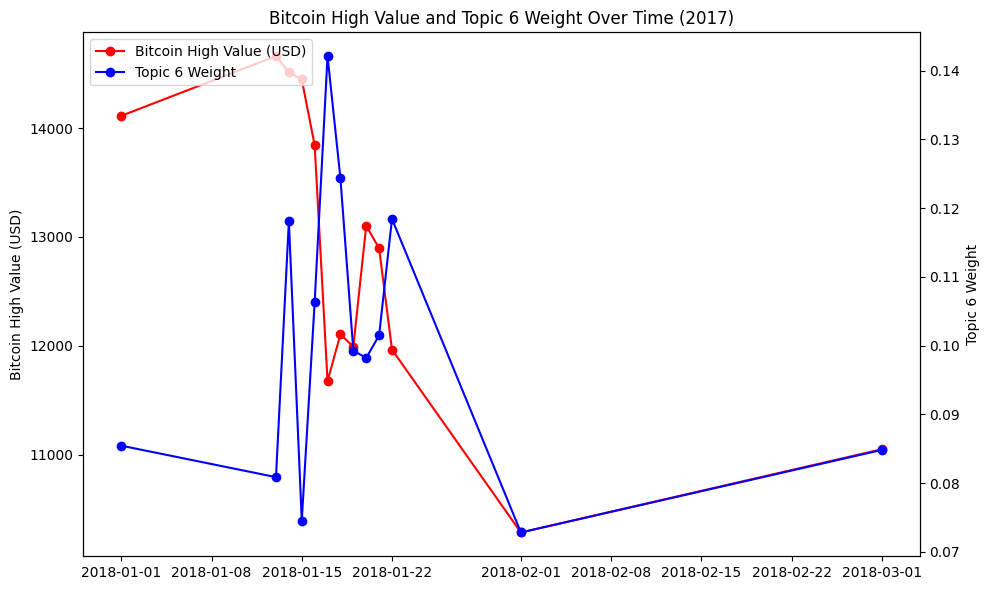

In [96]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Filter data for the year 2017
start_date = pd.Timestamp(datetime(2018, 1, 1))
end_date = pd.Timestamp(datetime(2018, 3, 1))
indices_2017 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2017 = [time_list[i] for i in indices_2017]
W_2017 = W[:, indices_2017]

# Load the Bitcoin data
btc_data = pd.read_csv('/Users/jazlynjose/Documents/nlp/Dataset/price_bitcoin (1).tsv', delimiter='\t', parse_dates=['date'])

# Filter Bitcoin data for the year 2017
btc_data_2017 = btc_data[(btc_data['date'] >= datetime(2018, 1, 1)) & (btc_data['date'] <= datetime(2018, 3, 1))]

# Merge Bitcoin data with Topic 6 weight data based on dates
merged_data = pd.merge(btc_data_2017, pd.DataFrame({'date': time_list_2017, 'Topic 6 Weight': W_2017[5]}), on='date', how='inner')

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin high value for 2017 on the first y-axis
ax1.plot(merged_data['date'], merged_data['high'], marker='o', linestyle='-', color='red', label='Bitcoin High Value (USD)')
ax1.set_ylabel('Bitcoin High Value (USD)')
ax1.set_title('Bitcoin High Value and Topic 6 Weight Over Time (2017)')

# Create a secondary y-axis for Topic 6 weight
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['Topic 6 Weight'], marker='o', linestyle='-', color='blue', label='Topic 6 Weight')
ax2.set_ylabel('Topic 6 Weight')

# Format the x-axis as dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


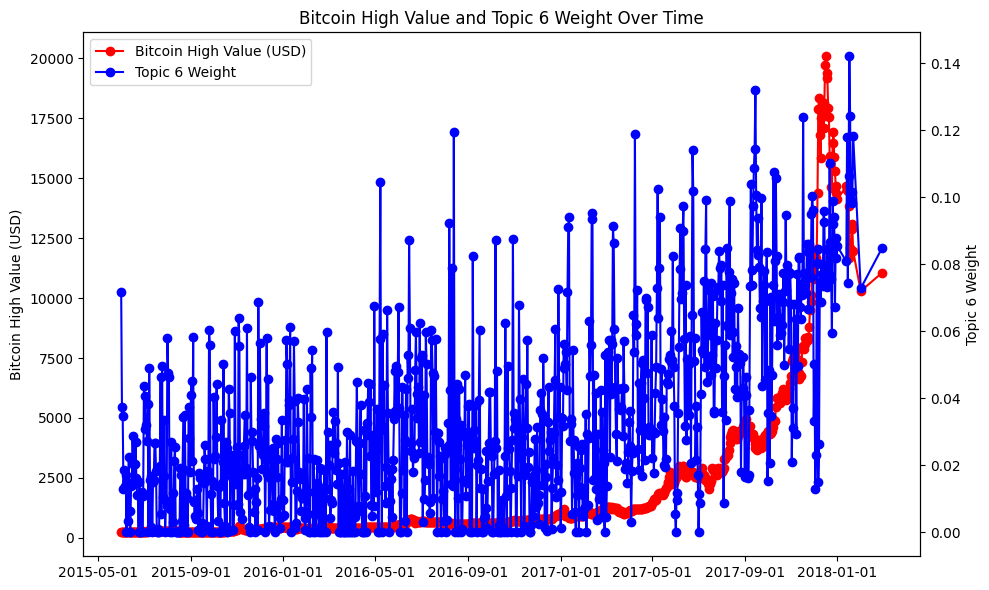

In [103]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Filter data for the year 2017
start_date = pd.Timestamp(datetime(2015, 1, 1))
end_date = pd.Timestamp(datetime(2018, 12, 31))
indices_2017 = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2017 = [time_list[i] for i in indices_2017]
W_2017 = W[:, indices_2017]

# Load the Bitcoin data
btc_data = pd.read_csv('/Users/jazlynjose/Documents/nlp/Dataset/price_bitcoin (1).tsv', delimiter='\t', parse_dates=['date'])

# Filter Bitcoin data for the year 2017
btc_data_2017 = btc_data[(btc_data['date'] >= datetime(2015, 1, 1)) & (btc_data['date'] <= datetime(2018, 12, 31))]

# Merge Bitcoin data with Topic 6 weight data based on dates
merged_data = pd.merge(btc_data_2017, pd.DataFrame({'date': time_list_2017, 'Topic 6 Weight': W_2017[5]}), on='date', how='inner')

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin high value for 2017 on the first y-axis
ax1.plot(merged_data['date'], merged_data['high'], marker='o', linestyle='-', color='red', label='Bitcoin High Value (USD)')
ax1.set_ylabel('Bitcoin High Value (USD)')
ax1.set_title('Bitcoin High Value and Topic 6 Weight Over Time')

# Create a secondary y-axis for Topic 6 weight
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['Topic 6 Weight'], marker='o', linestyle='-', color='blue', label='Topic 6 Weight')
ax2.set_ylabel('Topic 6 Weight')

# Format the x-axis as dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

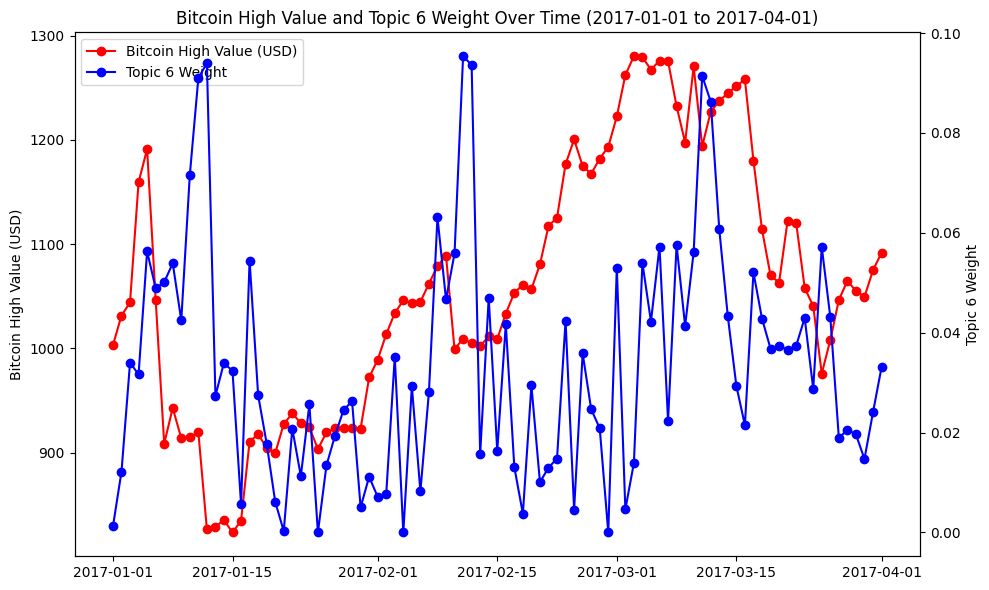

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Filter data for the specified period in 2017
start_date = pd.Timestamp(datetime(2017, 1, 1))
end_date = pd.Timestamp(datetime(2017, 4, 1))
indices_2017_period = [i for i, date in enumerate(time_list) if start_date <= date <= end_date]
time_list_2017_period = [time_list[i] for i in indices_2017_period]
W_2017_period = W[:, indices_2017_period]

# Load the Bitcoin data
btc_data = pd.read_csv('/Users/jazlynjose/Documents/nlp/Dataset/price_bitcoin (1).tsv', delimiter='\t', parse_dates=['date'])

# Filter Bitcoin data for the specified period in 2017
btc_data_period = btc_data[(btc_data['date'] >= datetime(2017, 1, 1)) & (btc_data['date'] <= datetime(2017, 4, 1))]

# Merge Bitcoin data with Topic 6 weight data based on dates
merged_data = pd.merge(btc_data_period, pd.DataFrame({'date': time_list_2017_period, 'Topic 6 Weight': W_2017_period[5]}), on='date', how='inner')

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin high value for the specified period in 2017 on the first y-axis
ax1.plot(merged_data['date'], merged_data['high'], marker='o', linestyle='-', color='red', label='Bitcoin High Value (USD)')
ax1.set_ylabel('Bitcoin High Value (USD)')
ax1.set_title('Bitcoin High Value and Topic 6 Weight Over Time (2017-01-01 to 2017-04-01)')

# Create a secondary y-axis for Topic 6 weight
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['Topic 6 Weight'], marker='o', linestyle='-', color='blue', label='Topic 6 Weight')
ax2.set_ylabel('Topic 6 Weight')

# Format the x-axis as dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


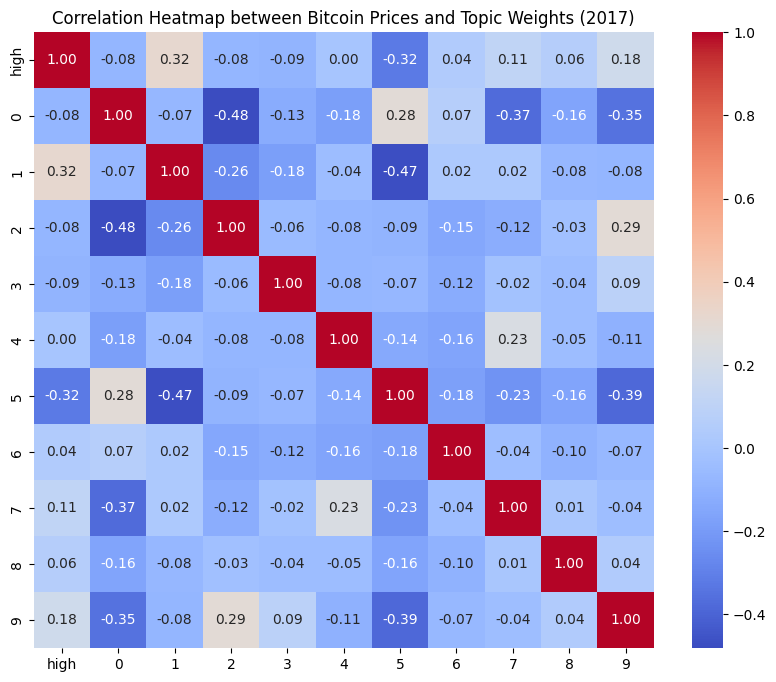

In [104]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = pd.concat([btc_data_2017['high'], pd.DataFrame(W_2017.T)], axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap between Bitcoin Prices and Topic Weights (2017)')
plt.show()


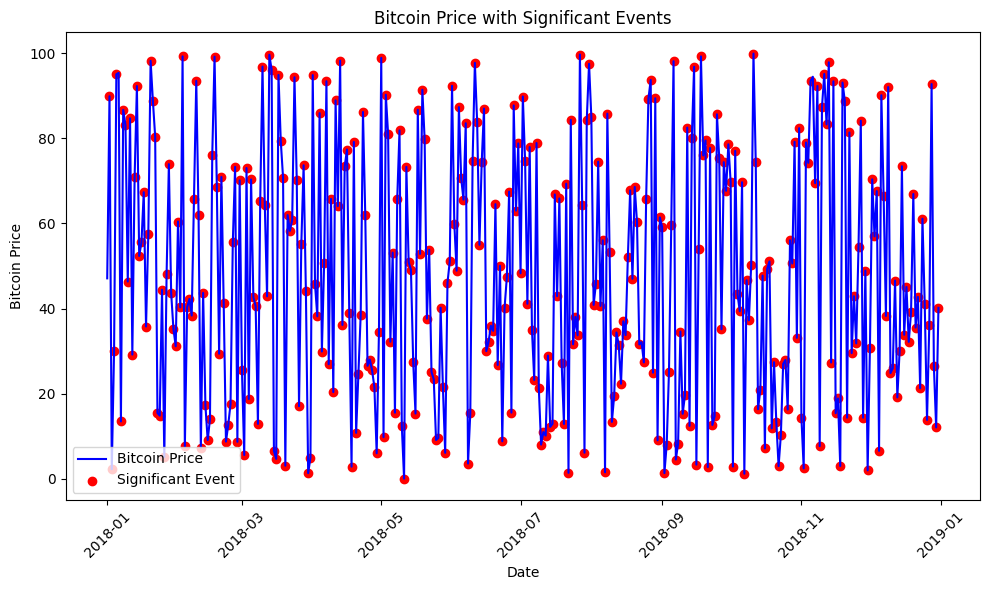

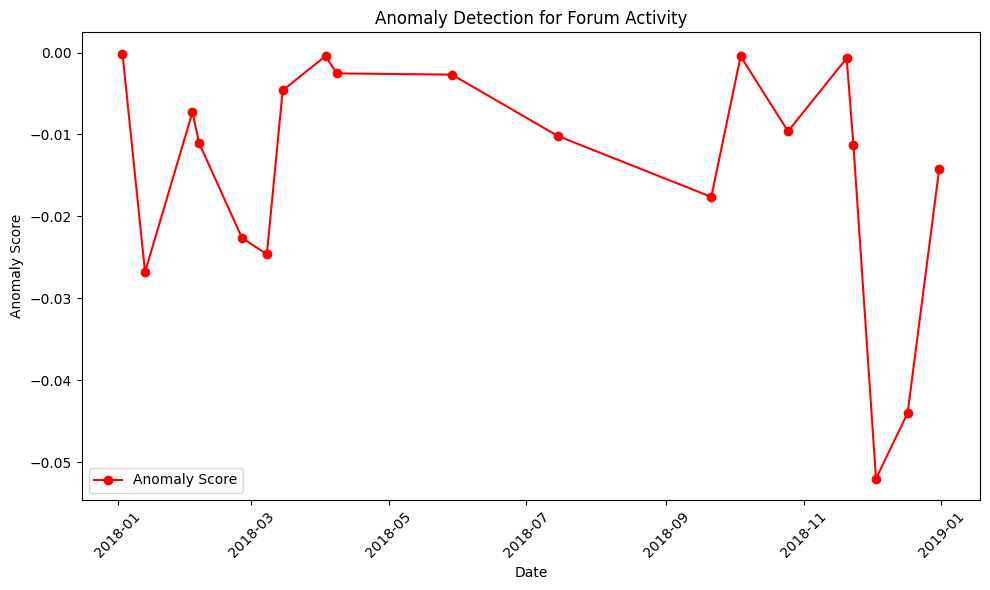

In [118]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from datetime import datetime

# Define the start and end dates
start_date = '2018-01-01'
end_date = '2018-12-31'

# Generate example data
time_list = pd.date_range(start=start_date, end=end_date, freq='D')
btc_data = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq='D'),
                         'high': np.random.rand(len(time_list)) * 100})  # Example Bitcoin price data
num_topics = 10
W = np.random.rand(num_topics, len(time_list))  # Example topic weights data

# Step 1: Preprocess the data
forum_data = pd.DataFrame({'Date': time_list, 'Bitcoin_Price': btc_data['high']})
for i in range(W.shape[0]):
    forum_data[f'Topic_{i+1}_Weight'] = W[i]

# Step 2: Detect significant events
# Example threshold for significant changes in Bitcoin prices
price_threshold = 0.03

# Identify dates with significant price changes
significant_events = forum_data[np.abs(forum_data['Bitcoin_Price'].pct_change()) >= price_threshold]

# Step 3: Identify relevant discussions
relevant_discussions = pd.concat([forum_data[forum_data['Date'] == date] for date in significant_events['Date']])

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(forum_data['Date'], forum_data['Bitcoin_Price'], color='blue', label='Bitcoin Price')
plt.scatter(significant_events['Date'], significant_events['Bitcoin_Price'], color='red', label='Significant Event')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price with Significant Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Anomaly Detection
# Step 1: Train an anomaly detection model
model = IsolationForest(contamination=0.05)
model.fit(W.T)

# Step 2: Detect anomalies
anomaly_scores = model.decision_function(W.T)

# Identify dates with anomalies
anomalies = pd.DataFrame({'Date': time_list, 'Anomaly_Score': anomaly_scores})
anomalies = anomalies[anomalies['Anomaly_Score'] < 0]

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(anomalies['Date'], anomalies['Anomaly_Score'], color='red', marker='o', linestyle='-', label='Anomaly Score')
plt.xlabel('Date')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection for Forum Activity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


